In [72]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn import metrics
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

df = pd.read_csv('/Users/user/Downloads/train.csv')



Для данной лаборотной работы возьму новый датасет. Здесь целевым классом будет price_range.

In [15]:
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

Можно заметить, что классы сбалансированы.

1) Оценим и сравним результаты классификации, используя следующие алгоритмы классификации:
* kNN
* дерево решений

In [43]:
x = df.drop('price_range', axis=1)
y = df['price_range']

Делим выборку на train и test

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм (precision и recall не зависят, в отличие от accuracy, от соотношения классов и потому применимы в условиях несбалансированных выборок).

F-мера  — среднее гармоническое precision и recall. F-мера достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю.

Одним из способов оценить модель в целом, не привязываясь к конкретному порогу, является AUC-ROC (или ROC AUC) — площадь (Area Under Curve) под кривой ошибок (Receiver Operating Characteristic curve ). 

In [84]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69       100
           1       0.39      0.43      0.41        95
           2       0.43      0.45      0.44        98
           3       0.72      0.48      0.57       107

    accuracy                           0.53       400
   macro avg       0.54      0.53      0.53       400
weighted avg       0.55      0.53      0.53       400



accuracy - доля правильных ответов алгоритма: в данном случае 0.53, что говорит о необходимости доработки алгоритма (плохо предсказывает).
В целом по полученным результатам можно сделать вывод, что алгоритм не очень удачно предсказывает значения.

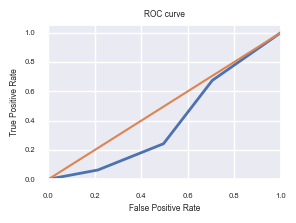

In [85]:
sns.set(font_scale=0.5)
sns.set_color_codes("muted")

plt.figure(figsize=(3,2))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

Площадь под кривой в данном случае показывает качество алгоритма (больше — лучше), кроме этого, важной является крутизна самой кривой — мы хотим максимизировать TPR, минимизируя FPR, а значит, наша кривая в идеале должна стремиться к точке (0,1).

 В идеальном случае, когда классификатор не делает ошибок (FPR = 0, TPR = 1) мы получим площадь под кривой, равную единице; в противном случае, когда классификатор случайно выдает вероятности классов, AUC-ROC будет стремиться к 0.5, так как классификатор будет выдавать одинаковое количество TP и FP (как в данном случае). Хороший классификатор держится от указанной линии настолько далеко, насколько это возможно (стремясь к левому верхнему углу). Можно сделать вывод, что kNN не является удачным способом классифицировать данные в этом случае.
 

In [86]:
classifier = DecisionTreeClassifier() 
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       100
           1       0.71      0.81      0.76        95
           2       0.72      0.68      0.70        98
           3       0.89      0.85      0.87       107

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



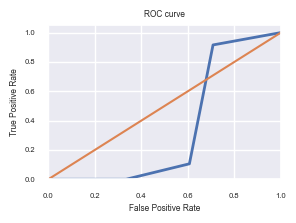

In [87]:
sns.set(font_scale=0.5)
plt.figure(figsize=(3,2))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

Легко заметить, что дерево решений в данном случае сработало лучше, чем метод kNN. 
Accuracy теперь равняется 0.81, а значит алгоритм лучше предсказывает значения (т.к. классы сбалансированы, можно рассуждать о метрике accuracy как о значимой)

ROC curve все еще не показывает идеального значения, но площадь под кривой стала больше, чем в предыдущем методе.

Значения других метрик также улучшились, а значит алгоритм классификации "дерево решений" к датасету подходит лучше.
Но этот метод очень чувствителен к шумам во входных данных, вся модель может кардинально измениться, если немного изменится обучающая выборка (например, если убрать один из признаков или добавить несколько объектов), поэтому и правила классификации могут сильно изменяться, что ухудшает интерпретируемость модели.

Метод kNN мог показать себя хуже из-за многих факторов:
 - Выбор по умолчанию евклидового расстояния чаще всего ничем не обоснован. Можно отыскать хорошее решение перебором параметров, но для большого набора данных это отнимает много времени;
 - Нет теоретических оснований выбора определенного числа соседей — только перебор (впрочем, чаще всего это верно для всех гиперпараметров всех моделей). В случае малого числа соседей метод чувствителен к выбросам, то есть склонен переобучаться;
 - Как правило, плохо работает, когда признаков много.